In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv('training/daily-bike-share.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [251]:
df.shape

(731, 14)

In [252]:
df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
rentals       606
dtype: int64

In [253]:
df = df.set_index('instant')
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
instant,,,,,,,,,,,,,
1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 80.0+ KB


In [255]:
df[df.duplicated()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
instant,,,,,,,,,,,,,


In [256]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


In [257]:
features = ['temp', 'atemp', 'hum', 'windspeed', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday', 'yr']

In [258]:
df[features + ['rentals']]

,temp,atemp,hum,windspeed,mnth,holiday,weekday,weathersit,workingday,yr,rentals
instant,,,,,,,,,,,
1,0.344167,0.363625,0.805833,0.160446,1,0,6,2,0,0,331
2,0.363478,0.353739,0.696087,0.248539,1,0,0,2,0,0,131
3,0.196364,0.189405,0.437273,0.248309,1,0,1,1,1,0,120
4,0.200000,0.212122,0.590435,0.160296,1,0,2,1,1,0,108
5,0.226957,0.229270,0.436957,0.186900,1,0,3,1,1,0,82
...,...,...,...,...,...,...,...,...,...,...,...
727,0.254167,0.226642,0.652917,0.350133,12,0,4,2,1,1,247
728,0.253333,0.255046,0.590000,0.155471,12,0,5,2,1,1,644
729,0.253333,0.242400,0.752917,0.124383,12,0,6,2,0,1,159


In [259]:
X, y = df[features], df['rentals']

In [260]:
X

,temp,atemp,hum,windspeed,mnth,holiday,weekday,weathersit,workingday,yr
instant,,,,,,,,,,
1,0.344167,0.363625,0.805833,0.160446,1,0,6,2,0,0
2,0.363478,0.353739,0.696087,0.248539,1,0,0,2,0,0
3,0.196364,0.189405,0.437273,0.248309,1,0,1,1,1,0
4,0.200000,0.212122,0.590435,0.160296,1,0,2,1,1,0
5,0.226957,0.229270,0.436957,0.186900,1,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
727,0.254167,0.226642,0.652917,0.350133,12,0,4,2,1,1
728,0.253333,0.255046,0.590000,0.155471,12,0,5,2,1,1
729,0.253333,0.242400,0.752917,0.124383,12,0,6,2,0,1


In [261]:
y[:10]

instant
1     331
2     131
3     120
4     108
5      82
6      88
7     148
8      68
9      54
10     41
Name: rentals, dtype: int64

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [263]:
X_train.shape

(584, 10)

In [264]:
X_test.shape

(147, 10)

In [265]:
from sklearn.linear_model import LinearRegression

In [266]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [267]:
model.coef_

array([ 1.74719230e+03,  3.15426517e+02, -3.95465311e+02, -9.50616262e+02,
        7.57522995e-01, -2.77886384e+02,  2.19646147e+01, -8.39389066e+01,
       -8.29634775e+02,  2.63359783e+02])

In [268]:
model.score(X_train, y_train)

0.6906833752699141

In [269]:
model.score(X_test, y_test)

0.6607939351393533

In [270]:
y_preds = model.predict(X_test)

In [271]:
y_preds[:10]

array([1781.00362044, 1053.94240579,  859.39391182, -164.78741285,
        445.80242693,  191.56286601,  309.97702033,  689.24859719,
       1607.42490828, -135.62036537])

In [272]:
y_preds.shape

(147,)

In [273]:
import numpy as np

import numpy as np
print("predicted labels", np.round(y_preds)[:10])
print("Actual labels", y_test.values[:10])

predicted labels [1781. 1054.  859. -165.  446.  192.  310.  689. 1607. -136.]
Actual labels [2418  754  222   47  244  145  240  555 3252   38]


In [274]:
from sklearn.metrics import mean_squared_error, r2_score

print("evaluation")
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_preds)

print("MSE", mse)
print("RMSE", rmse)
print("Score", score)

evaluation
MSE 179237.25136691987
RMSE 423.36420652544524
Score 0.6607939351393533


# Vecteur Support Machine (SVM)

In [275]:
from sklearn.svm import SVR

model_svr = SVR(C=900.0)

model_svr.fit(X_train, y_train)

SVR(C=900.0)

In [276]:
r2_score(y_train, model_svr.predict(X_train))

0.7284320846769309

In [277]:
y_preds_svr = model_svr.predict(X_test)

In [278]:
r2_score(y_test, y_preds_svr)

0.7059656042634912

In [279]:
mean_squared_error(y_test, y_preds_svr)

155368.43930192143

In [280]:
np.sqrt(mean_squared_error(y_test, y_preds_svr))

394.168034348197

In [281]:
print("predicted labels", np.round(y_preds_svr)[:10])
print("Actual labels", y_test.values[:10])

predicted labels [1843.  898.  167.   99.  138.   82.  372.  421. 1498.   -9.]
Actual labels [2418  754  222   47  244  145  240  555 3252   38]


## KNN (K plus proches voisin)

In [282]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

KNeighborsRegressor()

In [283]:
predictions = knn.predict(X_test)

In [284]:
print("predicted labels", np.round(predictions)[:10])
print("Actual labels", y_test.values[:10])

predicted labels [1828.  733.  136.  127.  179.  140.  484.  283. 2031.   98.]
Actual labels [2418  754  222   47  244  145  240  555 3252   38]


In [285]:
r2_score(y_train, knn.predict(X_train))

0.8337645248136469

In [286]:
r2_score(y_test, predictions)

0.7611496119728981

In [287]:
np.sqrt(mean_squared_error(y_test, predictions))

355.259179892595

## Classification

In [293]:
df = pd.read_csv('training/diabetes.csv')

In [294]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [295]:
df.shape

(15000, 10)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [316]:
df['Diabetic'].value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

In [297]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure']
X = df.drop(columns=['Diabetic', 'PatientID'])
y = df['Diabetic']

In [298]:
X

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23


In [299]:
print(y[:10])

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: Diabetic, dtype: int64


In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [301]:
X_train.shape

(10500, 8)

In [302]:
X_test.shape

(4500, 8)

In [337]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear') #balanced after - class_weight='balanced
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [338]:
y_preds = model.predict(X_test)

In [339]:
y_preds

array([0, 0, 0, ..., 0, 1, 0])

In [340]:
y_preds.shape

(4500,)

In [341]:
print("Predicted label", y_preds[:10])
print("Actual label", y_test.values[:10])

Predicted label [0 0 0 1 1 0 0 0 1 0]
Actual label [0 0 1 1 1 1 0 0 1 0]


In [342]:
from sklearn.metrics import accuracy_score

print("Accuracy Train :", accuracy_score(y_train, model.predict(X_train)))
print("Accuracy Test :", accuracy_score(y_test, y_preds))

Accuracy Train : 0.7862857142857143
Accuracy Test : 0.7893333333333333


In [343]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[2637,  349],
       [ 599,  915]])

 - les vrais positifs (VP), 
 - les faux positifs (FP), 
 - les vrais négatifs (VN) et 
 - les faux négatifs (FN). 
 
 Voici comment ces éléments sont définis :
 
 Les vrais positifs (VP) sont les cas où le modèle a correctement prédit que l'observation appartient à la classe positive.
 
Les faux positifs (FP) sont les cas où le modèle a prédit à tort que l'observation appartient à la classe positive.

Les vrais négatifs (VN) sont les cas où le modèle a correctement prédit que l'observation appartient à la classe négative.

Les faux négatifs (FN) sont les cas où le modèle a prédit à tort que l'observation appartient à la classe négative.

In [344]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

In [345]:
tn, fp, fn, tp

(2637, 349, 599, 915)

In [346]:
tn # true negative
tp # True positive

fn # False negative
fp # False posttive

349

In [347]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [348]:
predict_pro = model.predict_proba(X_test)
predict_pro[:10]

array([[0.81515877, 0.18484123],
       [0.96046742, 0.03953258],
       [0.80343055, 0.19656945],
       [0.25566807, 0.74433193],
       [0.35369114, 0.64630886],
       [0.55595974, 0.44404026],
       [0.90672957, 0.09327043],
       [0.92374492, 0.07625508],
       [0.33484279, 0.66515721],
       [0.56057313, 0.43942687]])

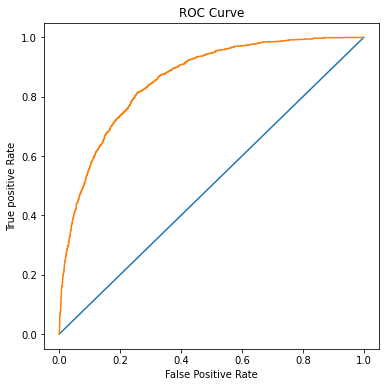

In [349]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_pro[:, 1])
fig = plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")
plt.show()

# 2. Apprentissage non supervise

In [205]:
data = pd.read_csv('training/seeds.csv')

In [206]:
data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [207]:
data['species'].value_counts()

0    70
1    70
2    70
Name: species, dtype: int64

In [208]:
data.shape

(210, 8)

In [209]:
X = data.drop(columns=['species'])

In [210]:
X.shape

(210, 7)

In [211]:
X

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [217]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)

In [218]:
# X_train, y_test = train_test_split(X, test_size=0.3)

In [219]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [220]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [222]:
data['species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Reduction de la dimensionnalite (PCA)

In [225]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scale_features = MinMaxScaler().fit_transform(X)

In [226]:
pca = PCA(n_components=2)

In [227]:
features_2d = pca.fit_transform(scale_features)

In [229]:
features_2d[:10]

array([[ 0.07502933,  0.12969116],
       [-0.02430059,  0.36411968],
       [-0.14937464,  0.45649725],
       [-0.18088051,  0.44055742],
       [ 0.25058879,  0.44129658],
       [-0.11363851,  0.36902075],
       [-0.04378114,  0.10966172],
       [-0.13412921,  0.31501281],
       [ 0.43988919,  0.00147033],
       [ 0.35028428,  0.18923482]])

In [230]:
pca.explained_variance_ratio_

array([0.78903362, 0.1290949 ])

In [231]:
pca.explained_variance_ratio_.sum()

0.9181285163980158

# Agglomerative

In [236]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_cluters = agg_model.fit_predict(X)

In [237]:
agg_cluters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [239]:
def plot_clusters(samples, clusters):
    col_dict = {0: 'blue', 1: 'green', 2: 'orange'}
    mrk_dict = {0: '*', 1:'x', 2: '+'}
    colors = [col_dict[x] for x in clusters]
    markers = [mrk_dict[x] for x in clusters]
    
    for sample in range(len(clusters)):
        plt.scatter(x=samples[sample][0], y=samples[sample][1], 
                   color=colors[sample])
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Clusters")
    plt.show()

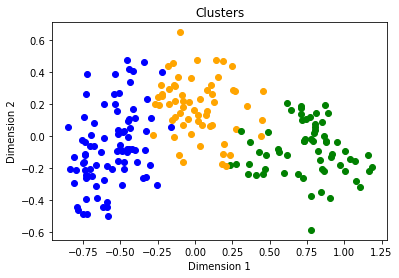

In [242]:
plot_clusters(features_2d, agg_cluters)

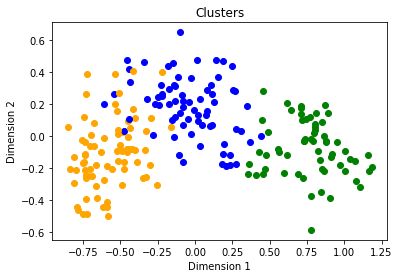

In [243]:
plot_clusters(features_2d, kmeans.labels_)